## Caution, basemap is at end-of-life. You should use cartopy for plotting maps with projections

### WeatherGod commented on Aug 9, 2017
I declared the EoL for Basemap last year on the webpage: https://matplotlib.org/basemap/users/intro.html#cartopy-new-management-and-eol-announcement

I encourage everyone to move to Cartopy because it is a superior API design. I have also advertised this for the past two SciPy conferences. Basemap just has no hope of being maintained.

I should point out that you will soon be getting some competition from the GMT project as they move into the python space, but they don't integrate at all with matplotlib, and there isn't any hope for interactive plotting at the moment. But, their figures are very pretty...

@WeatherGod (Benjamin Root)


### WeatherGod commented on Aug 9, 2017
Side note: I am the sole remaining "Basemap folks". I am just making sure the lights are turned off before I leave.

@WeatherGod (Benjamin Root)

In [1]:
import sys
import os
import matplotlib.pyplot as plt
from netCDF4 import Dataset as netcdf_dataset
import numpy as np
import xarray as xr

from cartopy import config
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.feature as cfeature 
# When data are defined in lat/lon coordinate system, PlateCarree()
# is the appropriate choice:

from cartopy.util import add_cyclic_point

## More plotting help

* [matplotlib gallery:](https://matplotlib.org/gallery.html#misc)
* [colormaps:](https://matplotlib.org/examples/color/colormaps_reference.html)
* [cartopy:](http://scitools.org.uk/cartopy/docs/v0.14/index.html)
* [geoviews:](http://geo.holoviews.org/Gridded_Datasets_I.html)

In [2]:
# get the path of the file. It can be found in the repo data directory.
fname = os.path.join(config["repo_data_dir"],
                     'netcdf', 'HadISST1_SST_update.nc'
                     )

dataset = netcdf_dataset(fname)
sst = dataset.variables['sst'][0, :, :]
lats = dataset.variables['lat'][:]
lons = dataset.variables['lon'][:]
data_crs = ccrs.PlateCarree()   # since our data is on a rectangular lon,lat grid


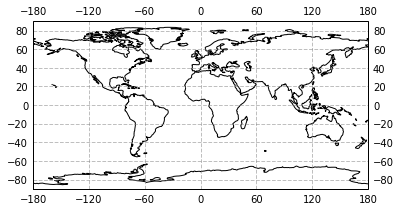

In [18]:
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
ax.add_feature(cfeature.COASTLINE)


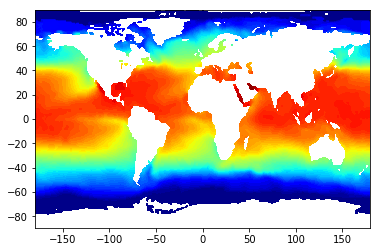

In [21]:
plt.contourf(lons, lats, sst, 60, cmap = "jet")

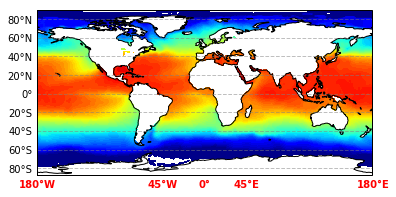

In [10]:
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
plt.contourf(lons, lats, sst, 60,
             transform=ccrs.PlateCarree(), cmap = "jet")
gl = ax.gridlines(crs=data_crs, draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlines = False
gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 15, 'color': 'black'}
gl.xlabel_style = {'color': 'red', 'weight': 'bold'}

ax.coastlines()
plt.show()

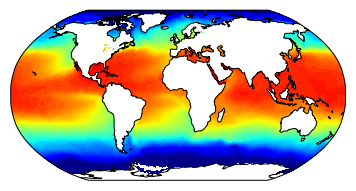

In [4]:
plt.figure()
ax2 = plt.axes(projection=ccrs.Robinson())
plt.contourf(lons, lats, sst, 60, transform=data_crs, cmap = "jet")
ax2.coastlines()

plt.show()

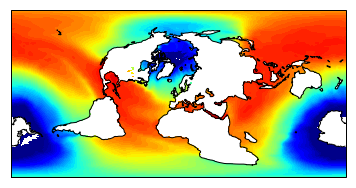

-179.5

In [14]:
# A rotated pole projection again...
projection = ccrs.RotatedPole(pole_longitude=-177.5, pole_latitude=37.5)
ax = plt.axes(projection=projection)
ax.set_global()
ax.coastlines()

# ...but now using the transform argument
sst_cyc, lons_cyc = add_cyclic_point(sst, coord=lons)
ax.contourf(lons, lats, sst, 60, transform=data_crs, cmap = "jet")
ax.contourf(lons_cyc, lats, sst_cyc, 60, transform=data_crs, cmap = "jet")
plt.show()
lons[0]

In [6]:
airtemps = xr.tutorial.load_dataset('air_temperature')
sst_cyc, lons_cyc = add_cyclic_point(sst, coord=lons)

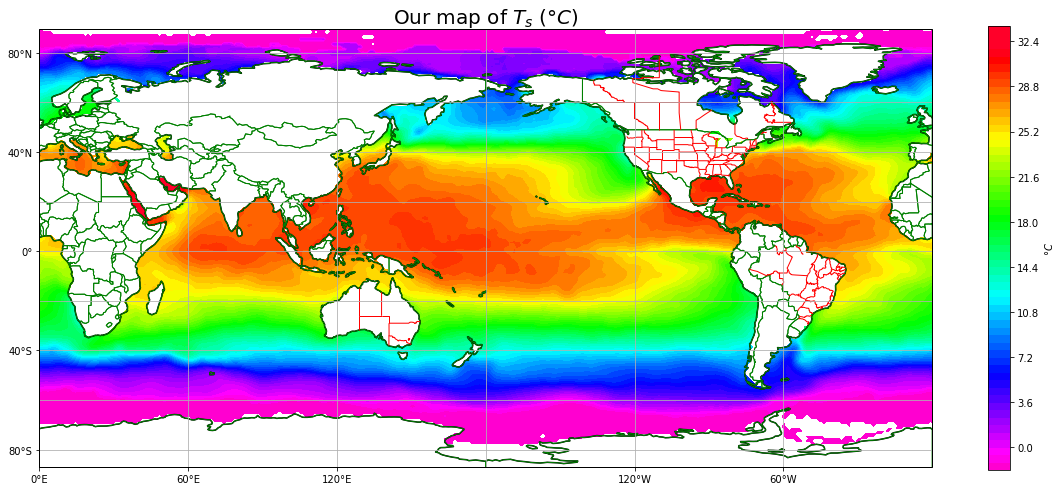

In [39]:
plt.figure(figsize=(20, 12))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
im = ax.contourf(lons_cyc, lats, sst_cyc, 60, vmin = -2, vmax = 32, transform=data_crs, cmap = "gist_rainbow_r")
cb = plt.colorbar(im, orientation='vertical', shrink = 0.68, label=r'$\degree C$')
ax.coastlines(linewidth=1.5)
# ax.stock_img()
ax.set_xticks([-120, -60 ,0, 60, 120], crs=ccrs.PlateCarree())
ax.set_yticks([-80,-40, 0, 40, 80], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.gridlines()
# ax.add_feature(cfeature.LAND, alpha=1.0)
# ax.add_feature(cfeature.OCEAN, alpha=0.3)
# ax.add_feature(cfeature.COASTLINE)
# ax.add_feature(cfeature.BORDERS, linestyle=':')
# ax.add_feature(cfeature.LAKES, alpha=1.0)
# ax.add_feature(cfeature.RIVERS)
# ax.add_feature(cfeature.STATES)


# Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
countries = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_0_countries',
    scale='110m',
    facecolor='none')
 
states_provincesl = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')


SOURCE = 'Natural Earth'
LICENSE = 'public domain'
ax.add_feature(countries, edgecolor='green')
ax.add_feature(states_provincesl, edgecolor='red')
    
plt.title(r'Our map of $T_s$ ($\degree C$)', fontsize=20)
plt.savefig('WorldMap.png')

In [ ]:
cfeature.STATES